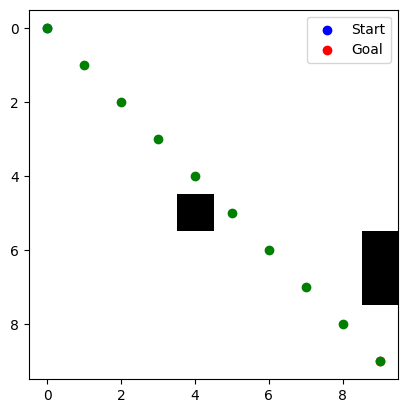

True

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

def generate_grid(size):
    return np.zeros((size, size))

def add_obstacles(grid, num_obstacles):
    size = grid.shape[0]
    for _ in range(num_obstacles):
        x, y = random.randint(0, size-1), random.randint(0, size-1)
        grid[x, y] = 1
    return grid

def plot_grid(grid, start, goal, path=None):
    fig, ax = plt.subplots()
    ax.imshow(grid, cmap='gray_r')
    
    ax.scatter(start[1], start[0], color='blue', label='Start')
    ax.scatter(goal[1], goal[0], color='red', label='Goal')
    
    if path:
        for point in path:
            ax.scatter(point[1], point[0], color='green')
    
    ax.legend()
    plt.show()

def find_shortest_path(start, goal):
    path = []
    x1, y1 = start
    x2, y2 = goal
    
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    
    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1
    
    err = dx - dy
    
    while (x1, y1) != (x2, y2):
        path.append((x1, y1))
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x1 += sx
        if e2 < dx:
            err += dx
            y1 += sy
    
    path.append((x2, y2))
    return path

def check_triangle_path(grid, path):
    for (x, y) in path:
        if grid[x, y] == 1:
            return False
    return True

# Main Execution
size = 10
num_obstacles = 3
start = (0, 0)
goal = (9, 9)

grid = generate_grid(size)
grid = add_obstacles(grid, num_obstacles)

shortest_path = find_shortest_path(start, goal)
triangle_path_valid = check_triangle_path(grid, shortest_path)

plot_grid(grid, start, goal, shortest_path if triangle_path_valid else None)

triangle_path_valid


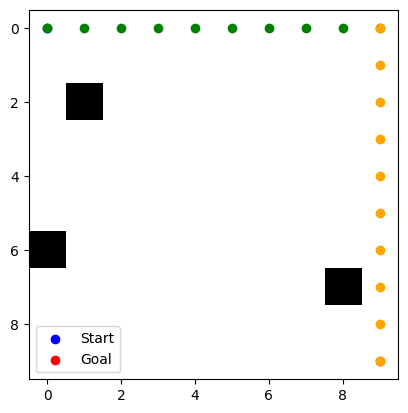

(True, True)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

def generate_grid(size):
    return np.zeros((size, size))

def add_obstacles(grid, num_obstacles):
    size = grid.shape[0]
    for _ in range(num_obstacles):
        x, y = random.randint(0, size-1), random.randint(0, size-1)
        grid[x, y] = 1
    return grid

def plot_grid(grid, start, goal, path1=None, path2=None):
    fig, ax = plt.subplots()
    ax.imshow(grid, cmap='gray_r')
    
    ax.scatter(start[1], start[0], color='blue', label='Start')
    ax.scatter(goal[1], goal[0], color='red', label='Goal')
    
    if path1:
        for point in path1:
            ax.scatter(point[1], point[0], color='green')
    if path2:
        for point in path2:
            ax.scatter(point[1], point[0], color='orange')
    
    ax.legend()
    plt.show()

def find_shortest_path(start, goal):
    path = []
    x1, y1 = start
    x2, y2 = goal
    
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    
    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1
    
    err = dx - dy
    
    while (x1, y1) != (x2, y2):
        path.append((x1, y1))
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x1 += sx
        if e2 < dx:
            err += dx
            y1 += sy
    
    path.append((x2, y2))
    return path

def create_triangle_paths(start, goal):
    (x1, y1) = start
    (x2, y2) = goal
    
    path1 = [(x1, y) for y in range(y1, y2+1)]
    path2 = [(x, y2) for x in range(x1, x2+1)]
    
    return path1, path2

def check_path(grid, path):
    for (x, y) in path:
        if grid[x, y] == 1:
            return False
    return True

# Main Execution
size = 10
num_obstacles = 3
start = (0, 0)
goal = (9, 9)

grid = generate_grid(size)
grid = add_obstacles(grid, num_obstacles)

path1, path2 = create_triangle_paths(start, goal)

path1_valid = check_path(grid, path1)
path2_valid = check_path(grid, path2)

plot_grid(grid, start, goal, path1 if path1_valid else None, path2 if path2_valid else None)

(path1_valid, path2_valid)


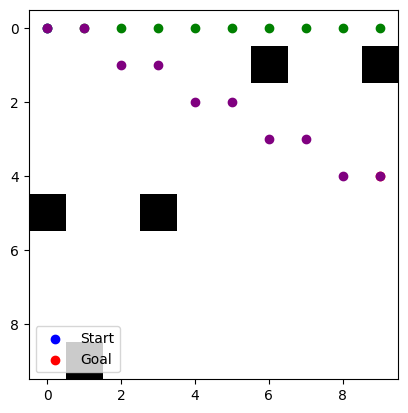

(True, False)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random

def generate_grid(size):
    return np.zeros((size, size))

def add_obstacles(grid, num_obstacles):
    size = grid.shape[0]
    for _ in range(num_obstacles):
        x, y = random.randint(0, size-1), random.randint(0, size-1)
        grid[x, y] = 1
    return grid

def plot_grid(grid, start, goal, path1=None, path2=None, hypotenuse=None):
    fig, ax = plt.subplots()
    ax.imshow(grid, cmap='gray_r')
    
    ax.scatter(start[1], start[0], color='blue', label='Start')
    ax.scatter(goal[1], goal[0], color='red', label='Goal')
    
    if path1:
        for point in path1:
            ax.scatter(point[1], point[0], color='green')
    if path2:
        for point in path2:
            ax.scatter(point[1], point[0], color='orange')
    if hypotenuse:
        for point in hypotenuse:
            ax.scatter(point[1], point[0], color='purple')
    
    ax.legend()
    plt.show()

def find_shortest_path(start, goal):
    path = []
    x1, y1 = start
    x2, y2 = goal
    
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    
    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1
    
    err = dx - dy
    
    while (x1, y1) != (x2, y2):
        path.append((x1, y1))
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x1 += sx
        if e2 < dx:
            err += dx
            y1 += sy
    
    path.append((x2, y2))
    return path

def create_triangle_paths(start, goal):
    (x1, y1) = start
    (x2, y2) = goal
    
    path1 = [(x1, y) for y in range(y1, y2+1)]
    path2 = [(x, y2) for x in range(x1, x2+1)]
    
    return path1, path2

def check_path(grid, path):
    for (x, y) in path:
        if grid[x, y] == 1:
            return False
    return True

# Main Execution
size = 10
num_obstacles = 5
start = (0, 0)
goal = (4, 9)

grid = generate_grid(size)
grid = add_obstacles(grid, num_obstacles)

# Find the hypotenuse (shortest path)
hypotenuse = find_shortest_path(start, goal)

# Create the paths for the two legs of the right triangle
path1, path2 = create_triangle_paths(start, goal)

# Check if the paths are valid (do not pass through obstacles)
path1_valid = check_path(grid, path1)
path2_valid = check_path(grid, path2)

# Plot the grid with the start and goal points, and the paths
plot_grid(grid, start, goal, path1 if path1_valid else None, path2 if path2_valid else None, hypotenuse)

(path1_valid, path2_valid)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

def generate_grid(size):
    return np.zeros((size, size))

def add_obstacles(grid, num_obstacles):
    size = grid.shape[0]
    for _ in range(num_obstacles):
        x, y = random.randint(0, size-1), random.randint(0, size-1)
        grid[x, y] = 1
    return grid

def plot_grid(grid, start, goal, paths, hypotenuse=None):
    fig, ax = plt.subplots()
    ax.imshow(grid, cmap='gray_r')
    
    ax.scatter(start[1], start[0], color='blue', label='Start')
    ax.scatter(goal[1], goal[0], color='red', label='Goal')
    
    for path in paths:
        for point in path:
            ax.scatter(point[1], point[0], color='green')
    if hypotenuse:
        for point in hypotenuse:
            ax.scatter(point[1], point[0], color='purple')
    
    ax.legend()
    plt.show()

def find_shortest_path(start, goal):
    path = []
    x1, y1 = start
    x2, y2 = goal
    
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    
    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1
    
    err = dx - dy
    
    while (x1, y1) != (x2, y2):
        path.append((x1, y1))
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x1 += sx
        if e2 < dx:
            err += dx
            y1 += sy
    
    path.append((x2, y2))
    return path

def create_triangle_paths(start, goal):
    (x1, y1) = start
    (x2, y2) = goal
    
    path1 = [(x1, y) for y in range(min(y1, y2), max(y1, y2)+1)]
    path2 = [(x, y2) for x in range(min(x1, x2), max(x1, x2)+1)]
    
    return path1, path2

def check_path(grid, path):
    for (x, y) in path:
        if grid[x, y] == 1:
            return False
    return True

def navigate_with_obstacles(grid, start, goal):
    current_start = start
    paths = []
    
    while current_start != goal:
        hypotenuse = find_shortest_path(current_start, goal)
        path1, path2 = create_triangle_paths(current_start, goal)
        
        path1_valid = check_path(grid, path1)
        path2_valid = check_path(grid, path2)
        
        if path1_valid and path2_valid:
            paths.append(path1)
            paths.append(path2)
            break
        else:
            if not path1_valid:
                for point in path1:
                    if grid[point] == 1:
                        new_start = (current_start[0], point[1])
                        vertical_path = find_shortest_path(current_start, new_start)
                        paths.append(vertical_path)
                        current_start = new_start
                        break
            if not path2_valid:
                for point in path2:
                    if grid[point] == 1:
                        new_start = (point[0], current_start[1])
                        vertical_path = find_shortest_path(current_start, new_start)
                        paths.append(vertical_path)
                        current_start = new_start
                        break
    
    return paths, hypotenuse

# Main Execution
size = 10
num_obstacles = 4
start = (0, 0)
goal = (6,6)

grid = generate_grid(size)
grid = add_obstacles(grid, num_obstacles)

# Navigate the grid while avoiding obstacles
paths, hypotenuse = navigate_with_obstacles(grid, start, goal)

# Plot the grid with the start and goal points, and the paths
plot_grid(grid, start, goal, paths, hypotenuse)


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def generate_grid(size):
    return np.zeros((size, size), dtype=int)

def add_obstacles(grid, obstacle_positions):
    for x, y in obstacle_positions:
        grid[x, y] = 1
    return grid

def plot_grid(grid, start, goal, paths, hypotenuse=None):
    fig, ax = plt.subplots()
    ax.imshow(grid, cmap='gray_r')
    
    ax.scatter(start[1], start[0], color='blue', label='Start')
    ax.scatter(goal[1], goal[0], color='red', label='Goal')
    
    for path in paths:
        for point in path:
            ax.scatter(point[1], point[0], color='green')
    if hypotenuse:
        for point in hypotenuse:
            ax.scatter(point[1], point[0], color='purple')
    
    ax.legend()
    plt.show()

def find_shortest_path(start, goal):
    x1, y1 = start
    x2, y2 = goal
    
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    
    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1
    
    err = dx - dy
    
    path = [(x1, y1)]
    while (x1, y1) != (x2, y2):
        e2 = err * 2
        if e2 > -dy:
            err -= dy
            x1 += sx
        if e2 < dx:
            err += dx
            y1 += sy
        path.append((x1, y1))
    return path

def create_triangle_paths(start, goal):
    (x1, y1) = start
    (x2, y2) = goal
    
    path1 = [(x1, y) for y in range(min(y1, y2), max(y1, y2)+1)]
    path2 = [(x, y2) for x in range(min(x1, x2), max(x1, x2)+1)]
    
    return path1, path2

def check_path(grid, path):
    return all(grid[x, y] == 0 for x, y in path)

def navigate_with_obstacles(grid, start, goal):
    current_start = start
    paths = []
    
    while current_start != goal:
        hypotenuse = find_shortest_path(current_start, goal)
        path1, path2 = create_triangle_paths(current_start, goal)
        
        path1_valid = check_path(grid, path1)
        path2_valid = check_path(grid, path2)
        
        if path1_valid and path2_valid:
            paths.append(path1)
            paths.append(path2)
            break
        else:
            if not path1_valid:
                for point in path1:
                    if grid[point] == 1:
                        new_start = (current_start[0], point[1])
                        vertical_path = find_shortest_path(current_start, new_start)
                        paths.append(vertical_path)
                        current_start = new_start
                        break
            if not path2_valid:
                for point in path2:
                    if grid[point] == 1:
                        new_start = (point[0], current_start[1])
                        vertical_path = find_shortest_path(current_start, new_start)
                        paths.append(vertical_path)
                        current_start = new_start
                        break
    
    return paths, hypotenuse

# Main Execution
size = 10
start = (0, 0)
goal = (9, 9)

# 원하는 장애물 위치를 지정합니다.
obstacle_positions = [(0, 4)]

grid = generate_grid(size)
grid = add_obstacles(grid, obstacle_positions)

# 장애물을 피하면서 그리드를 탐색합니다.
paths, hypotenuse = navigate_with_obstacles(grid, start, goal)

# 시작점, 목표점 및 경로를 포함하여 그리드를 시각화합니다.
plot_grid(grid, start, goal, paths, hypotenuse)


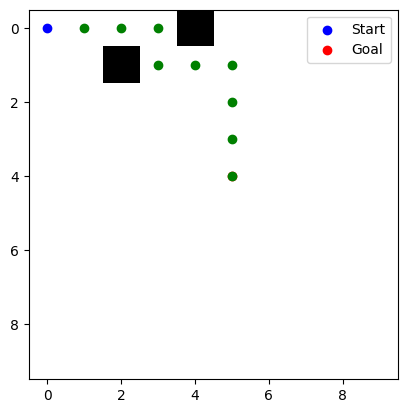

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import heapq

def generate_grid(size):
    return np.zeros((size, size), dtype=int)

def add_obstacles(grid, obstacle_positions):
    for x, y in obstacle_positions:
        grid[x, y] = 1
    return grid

def plot_grid(grid, start, goal, path):
    fig, ax = plt.subplots()
    ax.imshow(grid, cmap='gray_r')
    
    ax.scatter(start[1], start[0], color='blue', label='Start')
    ax.scatter(goal[1], goal[0], color='red', label='Goal')
    
    if path:
        for point in path:
            ax.scatter(point[1], point[0], color='green')
    
    ax.legend()
    plt.show()

def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star_algorithm(grid, start, goal):
    neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    close_set = set()
    came_from = {}
    gscore = {start: 0}
    fscore = {start: heuristic(start, goal)}
    oheap = []
    
    heapq.heappush(oheap, (fscore[start], start))
    
    while oheap:
        current = heapq.heappop(oheap)[1]
        
        if current == goal:
            data = []
            while current in came_from:
                data.append(current)
                current = came_from[current]
            return data[::-1]
        
        close_set.add(current)
        for i, j in neighbors:
            neighbor = current[0] + i, current[1] + j
            tentative_g_score = gscore[current] + 1
            
            if 0 <= neighbor[0] < grid.shape[0]:
                if 0 <= neighbor[1] < grid.shape[1]:                
                    if grid[neighbor[0]][neighbor[1]] == 1:
                        continue
                else:
                    continue
            else:
                continue
                
            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):
                continue
            
            if  tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1] for i in oheap]:
                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(oheap, (fscore[neighbor], neighbor))
    
    return False

# Main Execution
size = 10
start = (0, 0)
goal = (4, 5)

# 원하는 장애물 위치를 지정합니다.
obstacle_positions = [(1, 2), (0, 4)]

grid = generate_grid(size)
grid = add_obstacles(grid, obstacle_positions)

# A* 알고리즘을 사용하여 경로를 찾습니다.
path = a_star_algorithm(grid, start, goal)

# 시작점, 목표점 및 경로를 포함하여 그리드를 시각화합니다.
plot_grid(grid, start, goal, path)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import yaml
from PIL import Image

def load_map(map_yaml_path):
    with open(map_yaml_path, 'r') as file:
        map_metadata = yaml.safe_load(file)
    return map_metadata

def read_pgm(pgm_file_path):
    with open(pgm_file_path, 'rb') as f:
        pgm_header = f.readline().decode('ascii')
        assert pgm_header == 'P5\n'
        dimensions = f.readline().decode('ascii').strip()
        width, height = map(int, dimensions.split())
        maxval = int(f.readline().decode('ascii'))
        assert maxval <= 255

        image = np.fromfile(f, dtype=np.uint8).reshape((height, width))
    return image

def create_grid_from_image(image, grid_size):
    img = Image.fromarray(image)
    img_resized = img.resize((grid_size, grid_size), Image.ANTIALIAS)
    grid = np.array(img_resized)
    return grid

def generate_grid_from_map(map_yaml_path, grid_size=10):
    map_metadata = load_map(map_yaml_path)
    map_image_path = map_metadata['image']
    image = read_pgm(map_image_path)
    
    # Assuming obstacles are represented by 0 (black) and free space by 255 (white)
    obstacle_threshold = 128  # You may adjust this threshold based on your map's values
    grid = create_grid_from_image(image, grid_size)
    grid = np.where(grid < obstacle_threshold, 1, 0)  # Obstacles are marked as 1
    return grid

def plot_grid(grid, start, goal, path):
    fig, ax = plt.subplots()
    ax.imshow(grid, cmap='gray_r')

    ax.scatter(start[1], start[0], color='blue', label='Start')
    ax.scatter(goal[1], goal[0], color='red', label='Goal')

    if path:
        for point in path:
            ax.scatter(point[1], point[0], color='green')

    ax.legend()
    plt.show()

def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star_algorithm(grid, start, goal):
    neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    close_set = set()
    came_from = {}
    gscore = {start: 0}
    fscore = {start: heuristic(start, goal)}
    oheap = []

    heapq.heappush(oheap, (fscore[start], start))

    while oheap:
        current = heapq.heappop(oheap)[1]

        if current == goal:
            data = []
            while current in came_from:
                data.append(current)
                current = came_from[current]
            return data[::-1]

        close_set.add(current)
        for i, j in neighbors:
            neighbor = current[0] + i, current[1] + j
            tentative_g_score = gscore[current] + 1

            if 0 <= neighbor[0] < grid.shape[0]:
                if 0 <= neighbor[1] < grid.shape[1]:
                    if grid[neighbor[0]][neighbor[1]] == 1:
                        continue
                else:
                    continue
            else:
                continue

            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):
                continue

            if tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1] for i in oheap]:
                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(oheap, (fscore[neighbor], neighbor))

    return False

# Main Execution
map_yaml_path = '/home/addinedu/main.yaml'  # Update this path as necessary
grid_size = 10
start = (0, 0)
goal = (9, 9)

grid = generate_grid_from_map(map_yaml_path, grid_size)

# A* 알고리즘을 사용하여 경로를 찾습니다.
path = a_star_algorithm(grid, start, goal)

# 시작점, 목표점 및 경로를 포함하여 그리드를 시각화합니다.
plot_grid(grid, start, goal, path)


FileNotFoundError: [Errno 2] No such file or directory: 'main.pgm'